In [2]:
import pandas_datareader.data as web
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
start = datetime.datetime(2015, 8, 7)

end = datetime.datetime(2021, 7, 19)

In [8]:
BTC = web.DataReader("BTC-USD", 'yahoo', start, end)
ETH = web.DataReader("ETH-USD", 'yahoo', start, end)
LTC = web.DataReader("LTC-USD", 'yahoo', start, end)
XRP = web.DataReader("XRP-USD", 'yahoo', start, end)
BTC.drop(columns = 'Adj Close', inplace = True)
ETH.drop(columns = 'Adj Close', inplace = True)
LTC.drop(columns = 'Adj Close', inplace = True)
XRP.drop(columns = 'Adj Close', inplace = True)

In [9]:
for coin_df in (BTC, ETH, LTC, XRP):
    coin_df['Normed Return'] = coin_df['Close']/coin_df.iloc[0]['Close']

In [16]:
BTC.head()

,High,Low,Open,Close,Volume,Normed Return,Allocation
Date,,,,,,,
2015-08-06,280.391998,276.365997,278.740997,279.584991,42484800.0,1.000000,0.300000
2015-08-07,279.928009,260.709991,279.742004,260.997009,58533000.0,0.933516,0.280055
2015-08-08,267.002991,260.467987,261.115997,265.083008,23789600.0,0.948130,0.284439
2015-08-09,267.032013,262.596008,265.477997,264.470001,20979400.0,0.945938,0.283781
2015-08-10,270.385986,264.093994,264.342010,270.385986,25433900.0,0.967098,0.290129


In [14]:
for coin_df, allo in zip([BTC, ETH, LTC, XRP],[.3,.2,.4,.1]):
    coin_df['Allocation'] = coin_df['Normed Return'] * allo

In [17]:
BTC.head()

,High,Low,Open,Close,Volume,Normed Return,Allocation
Date,,,,,,,
2015-08-06,280.391998,276.365997,278.740997,279.584991,42484800.0,1.000000,0.300000
2015-08-07,279.928009,260.709991,279.742004,260.997009,58533000.0,0.933516,0.280055
2015-08-08,267.002991,260.467987,261.115997,265.083008,23789600.0,0.948130,0.284439
2015-08-09,267.032013,262.596008,265.477997,264.470001,20979400.0,0.945938,0.283781
2015-08-10,270.385986,264.093994,264.342010,270.385986,25433900.0,0.967098,0.290129


In [18]:
# invested a million dollars 
for coin_df in [BTC, ETH, LTC, XRP]:
    coin_df['Position Values'] = coin_df['Allocation'] * 1000000

In [19]:
BTC.head()

,High,Low,Open,Close,Volume,Normed Return,Allocation,Position Values
Date,,,,,,,,
2015-08-06,280.391998,276.365997,278.740997,279.584991,42484800.0,1.000000,0.300000,300000.000000
2015-08-07,279.928009,260.709991,279.742004,260.997009,58533000.0,0.933516,0.280055,280054.742480
2015-08-08,267.002991,260.467987,261.115997,265.083008,23789600.0,0.948130,0.284439,284439.096426
2015-08-09,267.032013,262.596008,265.477997,264.470001,20979400.0,0.945938,0.283781,283781.328723
2015-08-10,270.385986,264.093994,264.342010,270.385986,25433900.0,0.967098,0.290129,290129.292979


In [22]:
portfolio_val = pd.concat([BTC['Position Values'], ETH['Position Values'], LTC['Position Values'], XRP['Position Values']], axis=1)
portfolio_val.columns = ['BTC Pos','ETH Pos','LTC Pos','XRP Pos']

In [23]:
portfolio_val.head()

,BTC Pos,ETH Pos,LTC Pos,XRP Pos
Date,,,,
2015-08-06,300000.000000,200000.000000,400000.000000,100000.000000
2015-08-07,280054.742480,54350.099259,366396.707323,103974.492362
2015-08-08,284439.096426,50639.728827,370563.746494,108047.109478
2015-08-09,283781.328723,51112.361159,375343.834157,107335.627900
2015-08-10,290129.292979,77042.841414,395368.188852,105385.185641


In [24]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [28]:
portfolio_val.head()

,BTC Pos,ETH Pos,LTC Pos,XRP Pos,Total Pos
Date,,,,,
2015-08-06,300000.000000,200000.000000,400000.000000,100000.000000,1000000.000000
2015-08-07,280054.742480,54350.099259,366396.707323,103974.492362,804776.041425
2015-08-08,284439.096426,50639.728827,370563.746494,108047.109478,813689.681225
2015-08-09,283781.328723,51112.361159,375343.834157,107335.627900,817573.151938
2015-08-10,290129.292979,77042.841414,395368.188852,105385.185641,867925.508886


Text(0.5, 1.0, 'Total Portfolio Value')

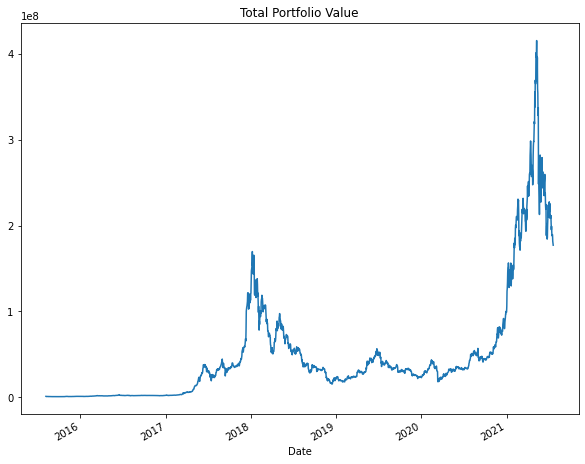

In [26]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

<AxesSubplot:xlabel='Date'>

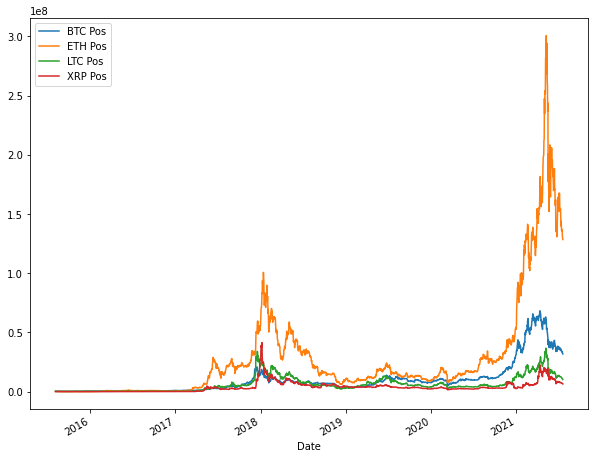

In [30]:
 portfolio_val.drop('Total Pos',axis=1).plot(figsize=(10,8), kind='line')

In [31]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [32]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 17614.90579966603 was percent!


In [33]:
portfolio_val['Daily Return'].mean()

0.003464107031622445

In [34]:
portfolio_val['Daily Return'].std()

0.046030206805439955

<AxesSubplot:ylabel='Density'>

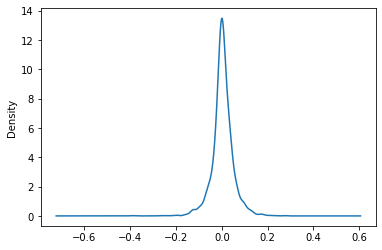

In [35]:
portfolio_val['Daily Return'].plot(kind='kde')

In [40]:
#Sharpe Ratio
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [37]:
SR

0.07525725544237721

In [42]:
#Annualized Sharpe Ratio
ASR = (252**0.5) * SR

In [43]:
ASR

1.1946718935227538

<AxesSubplot:ylabel='Density'>

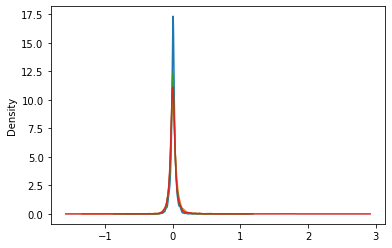

In [47]:
BTC['Close'].pct_change(1).plot(kind='kde')
ETH['Close'].pct_change(1).plot(kind='kde')
LTC['Close'].pct_change(1).plot(kind='kde')
XRP['Close'].pct_change(1).plot(kind='kde')

In [48]:
np.sqrt(252)* (np.mean(.001-0.0002)/.001)

12.699606293110037